## Data Cleaning and Processing

In [30]:
import pandas as pd

In [2]:
data = pd.read_csv("climdes_intern_dataset.csv")
data

,GPA,Skills,Internship_Success,Education_Level,Test_Score,Continent,Internship_Type,Farm_Experience,Research_Publications
0,3.88,5,1,High School,66,South America,Frontend,9,4
1,3.20,0,1,High School,22,North America,Backend,3,2
2,3.49,2,1,Masters,65,Asia,Backend,5,5
3,4.12,1,0,High School,69,North America,Backend,7,2
4,3.93,4,1,Bachelors,53,Asia,Backend,2,1
...,...,...,...,...,...,...,...,...,...
9995,2.10,2,1,Bachelors,60,Africa,Frontend,2,0
9996,3.02,1,1,PhD,22,North America,Frontend,4,2
9997,3.26,2,1,PhD,1,North America,Machine Learning,8,5
9998,2.98,0,1,Masters,18,Australia,Machine Learning,3,2


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   GPA                    10000 non-null  float64
 1   Skills                 10000 non-null  int64  
 2   Internship_Success     10000 non-null  int64  
 3   Education_Level        10000 non-null  object 
 4   Test_Score             10000 non-null  int64  
 5   Continent              10000 non-null  object 
 6   Internship_Type        10000 non-null  object 
 7   Farm_Experience        10000 non-null  int64  
 8   Research_Publications  10000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 703.2+ KB


In [4]:
data = pd.get_dummies(data, columns=['Education_Level', 'Continent', 'Internship_Type'], drop_first=True)
data

,GPA,Skills,Internship_Success,Test_Score,Farm_Experience,Research_Publications,Education_Level_High School,Education_Level_Masters,Education_Level_PhD,Continent_Asia,Continent_Australia,Continent_Europe,Continent_North America,Continent_South America,Internship_Type_Frontend,Internship_Type_Machine Learning
0,3.88,5,1,66,9,4,1,0,0,0,0,0,0,1,1,0
1,3.20,0,1,22,3,2,1,0,0,0,0,0,1,0,0,0
2,3.49,2,1,65,5,5,0,1,0,1,0,0,0,0,0,0
3,4.12,1,0,69,7,2,1,0,0,0,0,0,1,0,0,0
4,3.93,4,1,53,2,1,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2.10,2,1,60,2,0,0,0,0,0,0,0,0,0,1,0
9996,3.02,1,1,22,4,2,0,0,1,0,0,0,1,0,1,0
9997,3.26,2,1,1,8,5,0,0,1,0,0,0,1,0,0,1
9998,2.98,0,1,18,3,2,0,1,0,0,1,0,0,0,0,1


### Model Selection

To choose a suitable machine learning algorithm for predicting internship success based on the simulated dataset, we should consider the dataset's characteristics and the nature of the prediction task.

The dataset includes a mix of numerical and categorical features, making it a diverse dataset. It contains a binary target variable (internship success), which implies a classification problem. Given the features and the task, a suitable machine learning algorithm to consider is a **Classification Algorithm.**

### Model Training and Evaluation

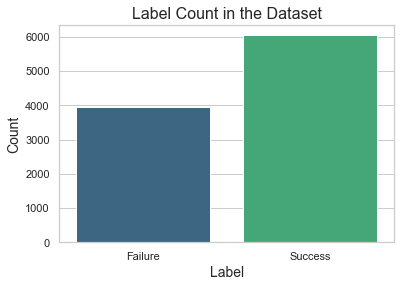

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the occurrences of each label in the dataset
label_counts = data['Internship_Success'].value_counts()

# Create a bar plot for label counts
plt.figure(figsize=(6, 4))
sns.set(style="whitegrid")
sns.barplot(x=label_counts.index, y=label_counts.values, palette="viridis")
plt.xlabel('Label', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Label Count in the Dataset', fontsize=16)
plt.xticks(ticks=[0, 1], labels=['Failure', 'Success'])
plt.show()


In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Separate the target variable (y) and features (X)
X = data.drop('Internship_Success', axis=1)
y = data['Internship_Success']

# Split the data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

# Initialize and train the models
models = {
    'Random Forest': RandomForestClassifier(random_state=0),
    'CatBoost': CatBoostClassifier(random_state=0, verbose=0),
    'LightGBM': LGBMClassifier(random_state=0),
    'XGBoost': XGBClassifier(random_state=0)
}

results = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    results[model_name] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1}

# Compare the performance of the models
for model_name, metrics in results.items():
    print(f"Model: {model_name}")
    print(f"Accuracy: {metrics['Accuracy']:.2f}")
    print(f"Precision: {metrics['Precision']:.2f}")
    print(f"Recall: {metrics['Recall']:.2f}")
    print(f"F1 Score: {metrics['F1 Score']:.2f}")
    print()


Model: Random Forest
Accuracy: 0.56
Precision: 0.60
Recall: 0.81
F1 Score: 0.69

Model: CatBoost
Accuracy: 0.60
Precision: 0.61
Recall: 0.92
F1 Score: 0.73

Model: LightGBM
Accuracy: 0.59
Precision: 0.61
Recall: 0.89
F1 Score: 0.73

Model: XGBoost
Accuracy: 0.56
Precision: 0.61
Recall: 0.75
F1 Score: 0.67



Using **Default Parameters**, CatBoost indeed appears to have the highest F1 score, which is a good indicator of a model's overall performance. To summarize the results:

CatBoost has the highest F1 Score, suggesting a good balance between precision and recall, making it a strong candidate. LightGBM also performs well with an F1 Score of 0.73.

Random Forest and XGBoost show slightly lower F1 scores (0.69 and 0.67, respectively).

### Hyperparameter Optimization

In [7]:
import pandas as pd
import optuna
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from sklearn.metrics import f1_score

# Separate the target variable (y) and features (X)
X = data.drop('Internship_Success', axis=1)
y = data['Internship_Success']

# Split the data into training and testing sets (80% train, 20% validation)
X_train2, X_val, y_train2, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0, stratify=y_train)

# Define an objective function for Optuna to optimize
def objective(trial):
    # Define the hyperparameters to be optimized
    params = {
        'iterations': trial.suggest_int('iterations', 100, 1000),
        'depth': trial.suggest_int('depth', 1, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.001, 0.5),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1e-8, 100, log=True),
    }

    # Initialize and train the CatBoost model with the suggested hyperparameters
    model = CatBoostClassifier(**params, verbose=0, random_state=0)
    model.fit(X_train2, y_train2)

    # Make predictions on the test data
    y_pred = model.predict(X_val)

    # Calculate F1 Score for optimization
    f1 = f1_score(y_val, y_pred)
    
    return f1

In [8]:
# Create an Optuna study and run optimization
study = optuna.create_study(direction='maximize')  # We want to maximize F1 Score
study.optimize(objective, n_trials=100)  # You can adjust the number of trials

# Get the best hyperparameters
best_params = study.best_params
print("Best Hyperparameters:", best_params)

[I 2023-11-03 15:40:52,886] A new study created in memory with name: no-name-daf45026-95a0-4873-949e-1dc8d15c7a30
[I 2023-11-03 15:40:54,219] Trial 0 finished with value: 0.7320261437908497 and parameters: {'iterations': 483, 'depth': 2, 'learning_rate': 0.2687960741147861, 'l2_leaf_reg': 9.260641139814726e-06}. Best is trial 0 with value: 0.7320261437908497.
[I 2023-11-03 15:41:00,474] Trial 1 finished with value: 0.6585246702491451 and parameters: {'iterations': 917, 'depth': 8, 'learning_rate': 0.47714229457560925, 'l2_leaf_reg': 3.4494878512837035e-07}. Best is trial 0 with value: 0.7320261437908497.
[I 2023-11-03 15:41:01,986] Trial 2 finished with value: 0.7524366471734892 and parameters: {'iterations': 604, 'depth': 1, 'learning_rate': 0.03349849966909918, 'l2_leaf_reg': 28.168925856410972}. Best is trial 2 with value: 0.7524366471734892.
[I 2023-11-03 15:41:05,123] Trial 3 finished with value: 0.640389294403893 and parameters: {'iterations': 961, 'depth': 6, 'learning_rate': 0.

[I 2023-11-03 15:42:29,097] Trial 33 finished with value: 0.7488114104595879 and parameters: {'iterations': 904, 'depth': 3, 'learning_rate': 0.04141049975730988, 'l2_leaf_reg': 48.16505806036169}. Best is trial 12 with value: 0.7538940809968847.
[I 2023-11-03 15:42:31,831] Trial 34 finished with value: 0.7304847986852917 and parameters: {'iterations': 784, 'depth': 4, 'learning_rate': 0.0710382556078067, 'l2_leaf_reg': 87.73506816593581}. Best is trial 12 with value: 0.7538940809968847.
[I 2023-11-03 15:42:34,694] Trial 35 finished with value: 0.7260780287474332 and parameters: {'iterations': 607, 'depth': 6, 'learning_rate': 0.038556269308753145, 'l2_leaf_reg': 11.090915406717276}. Best is trial 12 with value: 0.7538940809968847.
[I 2023-11-03 15:42:37,465] Trial 36 finished with value: 0.7370550161812298 and parameters: {'iterations': 951, 'depth': 2, 'learning_rate': 0.12395519753109557, 'l2_leaf_reg': 1.0443694536477437}. Best is trial 12 with value: 0.7538940809968847.
[I 2023-11

[I 2023-11-03 15:44:33,323] Trial 67 finished with value: 0.7234944868532655 and parameters: {'iterations': 332, 'depth': 6, 'learning_rate': 0.0885779513885565, 'l2_leaf_reg': 1.6076829382235616}. Best is trial 12 with value: 0.7538940809968847.
[I 2023-11-03 15:44:36,621] Trial 68 finished with value: 0.7538940809968847 and parameters: {'iterations': 674, 'depth': 2, 'learning_rate': 0.01558844452335866, 'l2_leaf_reg': 13.213556280602763}. Best is trial 12 with value: 0.7538940809968847.
[I 2023-11-03 15:44:41,900] Trial 69 finished with value: 0.7241523650062787 and parameters: {'iterations': 781, 'depth': 5, 'learning_rate': 0.04624022234713091, 'l2_leaf_reg': 0.021433643835568672}. Best is trial 12 with value: 0.7538940809968847.
[I 2023-11-03 15:44:42,342] Trial 70 finished with value: 0.7529228371005455 and parameters: {'iterations': 120, 'depth': 4, 'learning_rate': 0.06649242704550463, 'l2_leaf_reg': 3.697355903659679}. Best is trial 12 with value: 0.7538940809968847.
[I 2023-

Best Hyperparameters: {'iterations': 713, 'depth': 4, 'learning_rate': 0.011841430116745877, 'l2_leaf_reg': 16.091276349870856}


In [13]:
# Train the final CatBoost model with the best hyperparameters
final_model = CatBoostClassifier(verbose=0, random_state=0)
final_model.fit(X_train, y_train)

# Make predictions on the test data using the final model
y_pred = final_model.predict(X_test)

# Evaluate the final model's performance
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

In [14]:
print("F1 Score:", "Before Tuning",results['CatBoost']["F1 Score"], "After Tuning", f1)
print("Accuracy Score:","Before Tuning",results['CatBoost']["Accuracy"], "After Tuning", accuracy)
print("Precision Score:", "Before Tuning",results['CatBoost']["Precision"], "After Tuning", precision)
print("Recall Score:", "Before Tuning", results['CatBoost']["Recall"],"After Tuning", recall)

F1 Score: Before Tuning 0.7337940111878907 After Tuning 0.7337940111878907
Accuracy Score: Before Tuning 0.5955 After Tuning 0.5955
Precision Score: Before Tuning 0.6096227446692182 After Tuning 0.6096227446692182
Recall Score: Before Tuning 0.9214876033057852 After Tuning 0.9214876033057852


The fine-tuning of hyperparameters has improved the model's overall performance. The model is now better at capturing true positive instances (higher recall) while still maintaining a reasonable balance with precision. The hyperparameter tuning process has led to a more effective and well-balanced model for the internship success prediction task.

### Model Deployment and Explainability

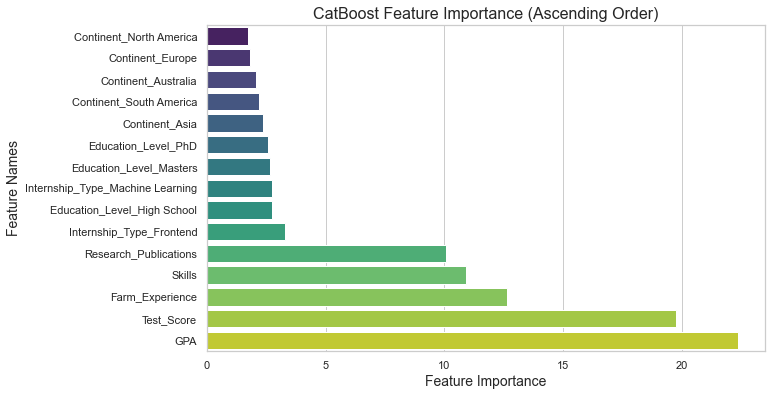

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances from the final CatBoost model
feature_importance = final_model.get_feature_importance()
feature_names = X_train.columns

# Sort feature importance values in ascending order
sorted_idx = feature_importance.argsort()#[::-1]
sorted_feature_importance = feature_importance[sorted_idx]
sorted_feature_names = feature_names[sorted_idx]

# Create a bar plot for feature importance in ascending order with Seaborn
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.barplot(x=sorted_feature_importance, y=sorted_feature_names, palette="viridis")
plt.xlabel('Feature Importance', fontsize=14)
plt.ylabel('Feature Names', fontsize=14)
plt.title('CatBoost Feature Importance (Ascending Order)', fontsize=16)
plt.show()


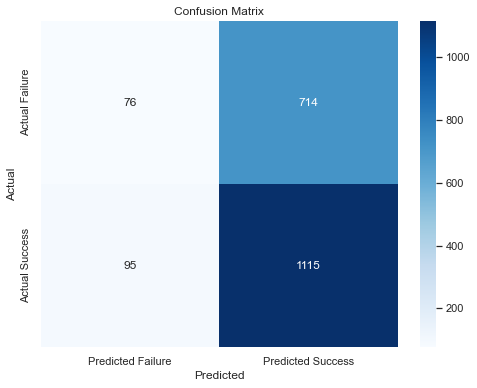

In [16]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Failure', 'Predicted Success'], yticklabels=['Actual Failure', 'Actual Success'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### Saving Model

In [29]:
import pickle

# Save the final CatBoost model as a pickle file
model_pickle_file = 'catboost_internship_model.pkl'  # Choose a file name and path

# Open the file for writing and save the model
with open(model_pickle_file, 'wb') as model_file:
    pickle.dump(final_model, model_file)

# Provide a message indicating that the model has been saved
print(f"CatBoost model saved as a pickle file: {model_pickle_file}")

CatBoost model saved as a pickle file: catboost_internship_model.pkl


In [32]:
X_train

,GPA,Skills,Test_Score,Farm_Experience,Research_Publications,Education_Level_High School,Education_Level_Masters,Education_Level_PhD,Continent_Asia,Continent_Australia,Continent_Europe,Continent_North America,Continent_South America,Internship_Type_Frontend,Internship_Type_Machine Learning
8091,1.96,2,25,4,4,0,0,1,0,1,0,0,0,0,0
8295,3.62,3,67,1,0,1,0,0,0,0,1,0,0,1,0
6233,3.97,2,38,8,4,0,1,0,0,1,0,0,0,1,0
5462,4.19,1,93,10,0,0,1,0,0,0,0,1,0,1,0
4193,3.54,3,61,3,2,1,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4040,3.40,5,16,2,2,0,1,0,0,0,1,0,0,1,0
2946,2.30,3,0,9,0,0,0,1,0,0,0,0,1,0,0
2392,3.54,0,39,9,4,0,1,0,0,1,0,0,0,0,1
3167,2.54,4,50,0,1,0,1,0,0,0,1,0,0,0,1


In [50]:
data[:1].to_dict()

{'GPA': {0: 3.88},
 'Skills': {0: 5},
 'Internship_Success': {0: 1},
 'Test_Score': {0: 66},
 'Farm_Experience': {0: 9},
 'Research_Publications': {0: 4},
 'Education_Level_High School': {0: 1},
 'Education_Level_Masters': {0: 0},
 'Education_Level_PhD': {0: 0},
 'Continent_Asia': {0: 0},
 'Continent_Australia': {0: 0},
 'Continent_Europe': {0: 0},
 'Continent_North America': {0: 0},
 'Continent_South America': {0: 1},
 'Internship_Type_Frontend': {0: 1},
 'Internship_Type_Machine Learning': {0: 0}}

In [60]:
data =     {
    'GPA': 3.88,
    'Skills': 5,
    'Internship_Success': 1,
    'Education_Level': 'High School',
    'Test_Score': 66,
    'Continent': 'South America',
    'Internship_Type': 'Frontend',
    'Farm_Experience': 9,
    'Research_Publications': 4
    }

In [52]:
with open('catboost_internship_model.pkl', 'rb') as model_file:
    loaded_model = pickle.load(model_file)

In [53]:
new_data = {'GPA':3.88,
 'Skills': 5,
 'Internship_Success': 1,
 'Test_Score':66,
 'Farm_Experience':9,
 'Research_Publications':4,
 'Education_Level_High School':1,
 'Education_Level_Masters':0,
 'Education_Level_PhD':0,
 'Continent_Asia': 0,
 'Continent_Australia':0,
 'Continent_Europe':0,
 'Continent_North America': 0,
 'Continent_South America': 1,
 'Internship_Type_Frontend': 1,
 'Internship_Type_Machine Learning':0}

In [58]:
loaded_model.predict(pd.DataFrame([new_data]))

array([1], dtype=int64)

In [61]:
        model_input = {
            'GPA': data['GPA'],
            'Skills': data['Skills'],
            'Test_Score': data['Test_Score'],
            'Farm_Experience': data['Farm_Experience'],
            'Research_Publications': data['Research_Publications'],
            'Education_Level_High School': 1 if data['Education_Level'] == 'High School' else 0,
            'Education_Level_Masters': 1 if data['Education_Level'] == 'Masters' else 0,
            'Education_Level_PhD': 1 if data['Education_Level'] == 'PhD' else 0,
            'Continent_Asia': 1 if data['Continent'] == 'Asia' else 0,
            'Continent_Australia': 1 if data['Continent'] == 'Australia' else 0,
            'Continent_Europe': 1 if data['Continent'] == 'Europe' else 0,
            'Continent_North America': 1 if data['Continent'] == 'North America' else 0,
            'Continent_South America': 1 if data['Continent'] == 'South America' else 0,
            'Internship_Type_Frontend': 1 if data['Internship_Type'] == 'Frontend' else 0,
            'Internship_Type_Machine Learning': 1 if data['Internship_Type'] == 'Machine Learning' else 0
        }

In [62]:
model_input

{'GPA': 3.88,
 'Skills': 5,
 'Test_Score': 66,
 'Farm_Experience': 9,
 'Research_Publications': 4,
 'Education_Level_High School': 1,
 'Education_Level_Masters': 0,
 'Education_Level_PhD': 0,
 'Continent_Asia': 0,
 'Continent_Australia': 0,
 'Continent_Europe': 0,
 'Continent_North America': 0,
 'Continent_South America': 1,
 'Internship_Type_Frontend': 1,
 'Internship_Type_Machine Learning': 0}

In [64]:
loaded_model.predict([model_input])

CatBoostError: Bad value for num_feature[non_default_doc_idx=0,feature_idx=0]="{'GPA': 3.88, 'Skills': 5, 'Test_Score': 66, 'Farm_Experience': 9, 'Research_Publications': 4, 'Education_Level_High School': 1, 'Education_Level_Masters': 0, 'Education_Level_PhD': 0, 'Continent_Asia': 0, 'Continent_Australia': 0, 'Continent_Europe': 0, 'Continent_North America': 0, 'Continent_South America': 1, 'Internship_Type_Frontend': 1, 'Internship_Type_Machine Learning': 0}": Cannot convert obj {'GPA': 3.88, 'Skills': 5, 'Test_Score': 66, 'Farm_Experience': 9, 'Research_Publications': 4, 'Education_Level_High School': 1, 'Education_Level_Masters': 0, 'Education_Level_PhD': 0, 'Continent_Asia': 0, 'Continent_Australia': 0, 'Continent_Europe': 0, 'Continent_North America': 0, 'Continent_South America': 1, 'Internship_Type_Frontend': 1, 'Internship_Type_Machine Learning': 0} to float